Found 7266 files belonging to 5 classes.
Using 5813 files for training.
Found 7266 files belonging to 5 classes.
Using 1453 files for validation.
Epoch 1/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 1291s 7s/step - accuracy: 0.4920 - loss: 1.2956 - val_accuracy: 0.7137 - val_loss: 0.7819
Epoch 2/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 134s 734ms/step - accuracy: 0.7233 - loss: 0.7962 - val_accuracy: 0.7963 - val_loss: 0.5738
Epoch 3/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 143s 740ms/step - accuracy: 0.7984 - loss: 0.6061 - val_accuracy: 0.8458 - val_loss: 0.4374
Epoch 4/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 142s 741ms/step - accuracy: 0.8415 - loss: 0.4416 - val_accuracy: 0.8823 - val_loss: 0.3457
Epoch 5/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 135s 735ms/step - accuracy: 0.8873 - loss: 0.3401 - val_accuracy: 0.8968 - val_loss: 0.2924
Epoch 6/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 136s 744ms/step - accuracy: 0.9031 - loss: 0.2704 - val_accuracy: 0.9167 - val_loss: 0.2731
Epoch 7/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 143s 756ms/step - accura

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

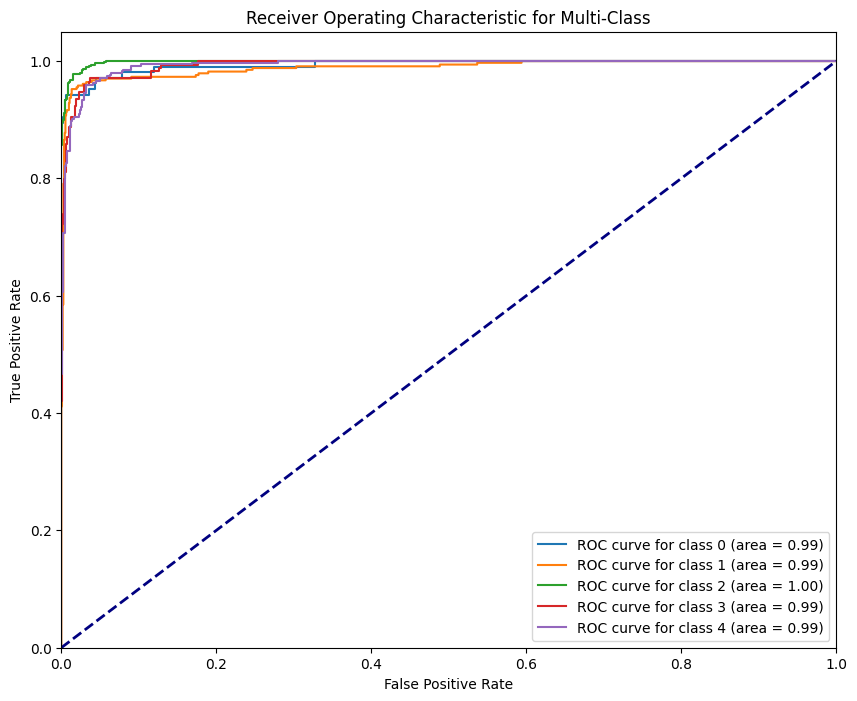

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Define the model architecture
def create_CNN_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(16, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Load your dataset using image_dataset_from_directory
data_dir = '/content/drive/MyDrive/lungsound classification using yolov11/5augmented_mfcc'  # Change to your chromogram directory
img_size = (128, 128)  # Set your desired image size

# Load the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=32
)

# Normalize the images
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Define input shape and number of classes
input_shape = (img_size[0], img_size[1], 3)  # Assuming RGB images
num_classes = 5  # Number of unique labels
class_names = ['0','1','2','3','4']  # Get class names

# Create and compile the model
model = create_CNN_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with your dataset
history = model.fit(train_ds, validation_data=val_ds, epochs=25)

# Optionally, save the model
model.save('/content/drive/MyDrive/mfcc5Aug_classification_model255(10).h5')

# Generate classification report
# Get true labels and predictions
y_true = []
y_pred = []

# Iterate through the validation dataset to collect true labels and predictions
for images, labels in val_ds:
    y_true.extend(labels.numpy())  # Append true labels
    predictions = model.predict(images)  # Get model predictions
    y_pred.extend(predictions)  # Store probabilities

# Convert lists to numpy arrays for sklearn
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate classification report
report = classification_report(y_true, np.argmax(y_pred, axis=1), target_names=class_names)
print(report)

# Binarize the output for ROC curve
y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))
y_pred_bin = y_pred  # y_pred already contains probabilities

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

Found 944 files belonging to 3 classes.
Using 756 files for training.
Found 944 files belonging to 3 classes.
Using 188 files for validation.
Epoch 1/35
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 734ms/step - accuracy: 0.3867 - loss: 1.3714 - val_accuracy: 0.3777 - val_loss: 1.0568
Epoch 2/35
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 648ms/step - accuracy: 0.5446 - loss: 0.9596 - val_accuracy: 0.5638 - val_loss: 0.9047
Epoch 3/35
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 692ms/step - accuracy: 0.5933 - loss: 0.8522 - val_accuracy: 0.5479 - val_loss: 0.8233
Epoch 4/35
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 666ms/step - accuracy: 0.6557 - loss: 0.7628 - val_accuracy: 0.6330 - val_loss: 0.7583
Epoch 5/35
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 644ms/step - accuracy: 0.7234 - loss: 0.7058 - val_accuracy: 0.7500 - val_loss: 0.6622
Epoch 6/35
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 650ms/step - accuracy: 0.7788 - loss: 0.5791 - val_accuracy: 0.8138 - val_loss: 0.5724
Epoch 7/35
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 682ms/step - accuracy: 0.7899 - loss: 0.53

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      1.00      1.00        57
           2       1.00      0.97      0.98        60

    accuracy                           0.99       188
   macro avg       0.99      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188



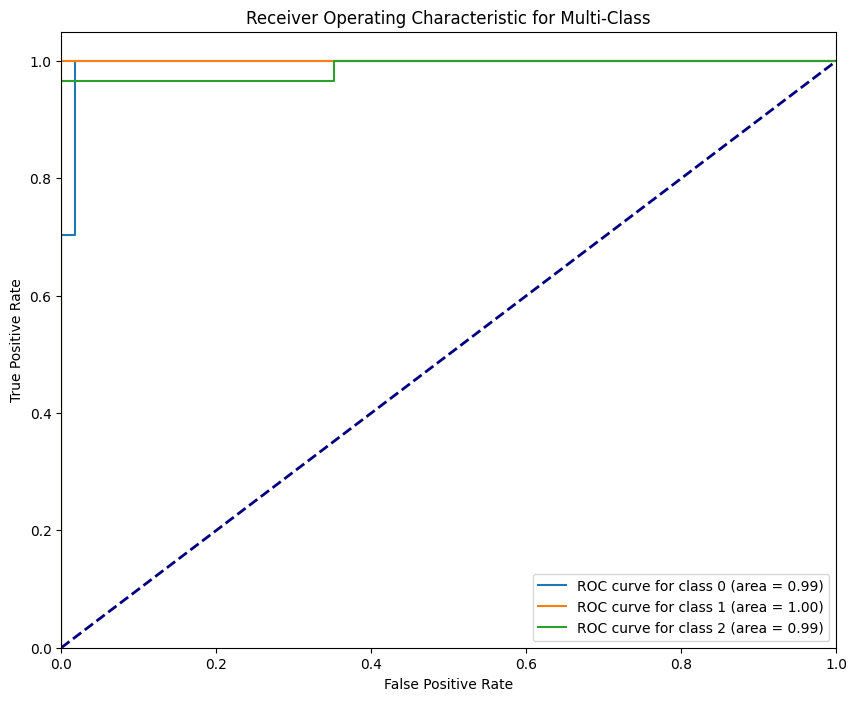

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Define the model architecture
def create_CNN_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(16, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.6)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Load your dataset using image_dataset_from_directory
data_dir = '/content/drive/MyDrive/lungsound classification using yolov11/3augmentedICBHI_mfcc'  # Change to your chromogram directory
img_size = (128, 128)  # Set your desired image size

# Load the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=32
)

# Normalize the images
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Define input shape and number of classes
input_shape = (img_size[0], img_size[1], 3)  # Assuming RGB images
num_classes = 3  # Number of unique labels
class_names = ['0', '1', '2']  # Get class names

# Create and compile the model
model = create_CNN_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with your dataset
history = model.fit(train_ds, validation_data=val_ds, epochs=35)

# Optionally, save the model
model.save('/content/drive/MyDrive/mfcc5Aug_classification_model2000(18).h5')

# Generate classification report
# Get true labels and predictions
y_true = []
y_pred = []

# Iterate through the validation dataset to collect true labels and predictions
for images, labels in val_ds:
    y_true.extend(labels.numpy())  # Append true labels
    predictions = model.predict(images)  # Get model predictions
    y_pred.extend(predictions)  # Store probabilities

# Convert lists to numpy arrays for sklearn
y_true = np.array(y_true)
y_pred = np.array(y_pred)  # This should be a 2D array of shape (num_samples, num_classes)

# Generate classification report
report = classification_report(y_true, np.argmax(y_pred, axis=1), target_names=class_names)
print(report)

# Binarize the output for ROC curve
y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])  # Use y_pred[:, i] for probabilities
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report

# Define the model architecture
def create_CNN_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(16, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.6)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Load your dataset using image_dataset_from_directory
data_dir = '/content/drive/MyDrive/lungsound classification using yolov11/3augmentedICBHI_mfcc'  # Change to your chromogram directory
img_size = (128, 128)  # Set your desired image size

# Load the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=32
)

# Normalize the images
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Define input shape and number of classes
input_shape = (img_size[0], img_size[1], 3)  # Assuming RGB images
num_classes = 5  # Number of unique labels
class_names = ['0','1','2']  # Get class names

# Create and compile the model
model = create_CNN_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with your dataset
history = model.fit(train_ds, validation_data=val_ds, epochs=35)

# Optionally, save the model
model.save('/content/drive/MyDrive/mfcc5Aug_classification_model2000(18).h5')

# Generate classification report
# Get true labels and predictions
y_true = []
y_pred = []

# Iterate through the validation dataset to collect true labels and predictions
for images, labels in val_ds:
    y_true.extend(labels.numpy())  # Append true labels
    predictions = model.predict(images)  # Get model predictions
    y_pred.extend(np.argmax(predictions, axis=1))  # Convert probabilities to class indices

# Convert lists to numpy arrays for sklearn
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

# Binarize the output for ROC curve
y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))
y_pred_bin = y_pred  # y_pred already contains probabilities

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

Found 944 files belonging to 3 classes.
Using 756 files for training.
Found 944 files belonging to 3 classes.
Using 188 files for validation.
Epoch 1/35
24/24 ━━━━━━━━━━━━━━━━━━━━ 123s 5s/step - accuracy: 0.3648 - loss: 1.4472 - val_accuracy: 0.4947 - val_loss: 0.9816
Epoch 2/35
24/24 ━━━━━━━━━━━━━━━━━━━━ 40s 699ms/step - accuracy: 0.5921 - loss: 0.9106 - val_accuracy: 0.6223 - val_loss: 0.8923
Epoch 3/35
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 775ms/step - accuracy: 0.6074 - loss: 0.8487 - val_accuracy: 0.6277 - val_loss: 0.7839
Epoch 4/35
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 686ms/step - accuracy: 0.6781 - loss: 0.7262 - val_accuracy: 0.6862 - val_loss: 0.7134
Epoch 5/35
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 701ms/step - accuracy: 0.7352 - loss: 0.6605 - val_accuracy: 0.7181 - val_loss: 0.6367
Epoch 6/35
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 692ms/step - accuracy: 0.7632 - loss: 0.5673 - val_accuracy: 0.8138 - val_loss: 0.5141
Epoch 7/35
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 677ms/step - accuracy: 0.8208 - loss: 0.4731

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       0.97      1.00      0.98        57
           2       1.00      0.93      0.97        60

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


IndexError: list index out of range

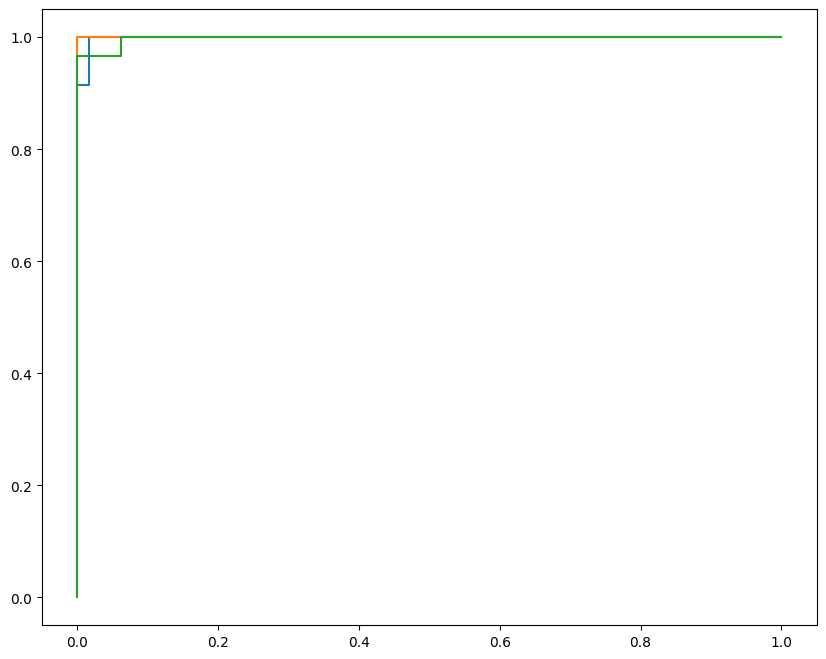

In [ ]:
# Get true labels and predictions
y_true = []
y_pred = []

# Iterate through the validation dataset to collect true labels and predictions
for images, labels in val_ds:
    y_true.extend(labels.numpy())  # Append true labels
    predictions = model.predict(images)  # Get model predictions
    y_pred.extend(predictions)  # Store probabilities

# Convert lists to numpy arrays for sklearn
y_true = np.array(y_true)
y_pred = np.array(y_pred)  # This should be a 2D array of shape (num_samples, num_classes)

# Binarize the output for ROC curve
y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))

# Now y_pred is already in the correct format (2D array of probabilities)
# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])  # Use y_pred[:, i] for probabilities
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming you have already defined num_classes and class_names
# y_true and y_pred should be collected as you have done

# Convert lists to numpy arrays for sklearn
y_true = np.array(y_true)
y_pred = np.array(y_pred)  # This should be a 2D array of shape (num_samples, num_classes)

# Binarize the output for ROC curve
y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))

# Check if y_pred has the correct shape
if y_pred.ndim == 1:
    # If y_pred is 1D, it means you only have one class predicted
    y_pred = np.expand_dims(y_pred, axis=1)  # Convert to 2D with one column

# Ensure y_pred has the correct number of classes
if y_pred.shape[1] < num_classes:
    # If there are fewer classes in predictions, adjust num_classes
    num_classes = y_pred.shape[1]
    class_names = class_names[:num_classes]  # Adjust class names accordingly

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])  # Use y_pred[:, i] for probabilities
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

NameError: name 'y_true' is not defined

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Define the model architecture
def create_CNN_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(16, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.6)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Load your dataset using image_dataset_from_directory
data_dir = '/content/drive/MyDrive/lungsound classification using yolov11/splitICBHI5augmented_mfcc'  # Change to your chromogram directory
img_size = (128, 128)  # Set your desired image size

# Load the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=32
)

# Normalize the images
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Define input shape and number of classes
input_shape = (img_size[0], img_size[1], 3)  # Assuming RGB images
num_classes = 5  # Number of unique labels
class_names = ['0','1','2']  # Get class names

# Create and compile the model
model = create_CNN_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with your dataset
history = model.fit(train_ds, validation_data=val_ds, epochs=35)

# Optionally, save the model
model.save('/content/drive/MyDrive/mfcc5Aug_classification_model2000(18).h5')

# Calculate FLOPs and MACs
def get_flops(model):
    # Create a dummy input tensor with the same shape as the model input
    input_shape = (1,) + model.input_shape[1:]  # Batch size of 1
    dummy_input = tf.random.normal(input_shape)

    # Use the model to get the output shape
    model(dummy_input)

    # Get the number of FLOPs
    flops = tf.keras.backend.count_params(model.trainable_weights) * 2  # Each multiply and add counts as 1 FLOP
    return flops

flops = get_flops(model)
print(f"Total FLOPs: {flops}")

# Generate classification report
# Get true labels and predictions
y_true = []
y_pred = []

# Iterate through the validation dataset to collect true labels and predictions
for images, labels in val_ds:
    y_true.extend(labels.numpy())  # Append true labels
    predictions = model.predict(images)  # Get model predictions
    y_pred.extend(np.argmax(predictions, axis=1))  # Convert probabilities to class indices

# Convert lists to numpy arrays for sklearn
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

# Binarize the output for ROC curve
y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))
y_pred_bin = y_pred  # y_pred already contains probabilities

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr [i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

Found 1416 files belonging to 2 classes.
Using 1133 files for training.
Found 1416 files belonging to 2 classes.
Using 283 files for validation.
Epoch 1/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 161s 4s/step - accuracy: 0.6943 - loss: 0.9994 - val_accuracy: 0.7597 - val_loss: 0.6771
Epoch 2/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 22s 602ms/step - accuracy: 0.8123 - loss: 0.5443 - val_accuracy: 0.7597 - val_loss: 0.5546
Epoch 3/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 552ms/step - accuracy: 0.7944 - loss: 0.5341 - val_accuracy: 0.7597 - val_loss: 0.6111
Epoch 4/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 23s 633ms/step - accuracy: 0.8071 - loss: 0.5272 - val_accuracy: 0.7597 - val_loss: 0.5543
Epoch 5/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 625ms/step - accuracy: 0.8126 - loss: 0.4990 - val_accuracy: 0.7597 - val_loss: 0.5680
Epoch 6/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 548ms/step - accuracy: 0.8018 - loss: 0.5091 - val_accuracy: 0.7597 - val_loss: 0.5526
Epoch 7/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 23s 634ms/step - accuracy: 0.8035 - loss: 0.5

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Define the model architecture
def create_CNN_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(16, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.6)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Load your dataset using image_dataset_from_directory
data_dir = '/content/drive/MyDrive/lungsound classification using yolov11/splitICBHI5augmented_mfcc'  # Change to your chromogram directory
img_size = (128, 128)  # Set your desired image size

# Load the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=32
)

# Normalize the images
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Define input shape and number of classes
input_shape = (img_size[0], img_size[1], 3)  # Assuming RGB images
num_classes = 5  # Number of unique labels
class_names = ['0','1','2']  # Get class names

# Create and compile the model
model = create_CNN_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with your dataset
history = model.fit(train_ds, validation_data=val_ds, epochs=35)

# Optionally, save the model
model.save('/content/drive/MyDrive/mfcc5Aug_classification_model221(18).h5')

# Calculate FLOPs
def get_flops(model):
    # Create a dummy input tensor with the same shape as the model input
    input_shape = (1,) + model.input_shape[1:]  # Batch size of 1
    dummy_input = tf.random.normal(input_shape)

    # Use the model to get the output shape
    model(dummy_input)

    # Get the number of FLOPs
    flops = tf.keras.backend.get_flops(model)  # Use the built-in function to get FLOPs
    return flops

flops = get_flops(model)
print(f"Total FLOPs: {flops}")

# Generate classification report
# Get true labels and predictions
y_true = []
y_pred = []

# Iterate through the validation dataset to collect true labels and predictions
for images, labels in val_ds:
    y_true.extend(labels.numpy())  # Append true labels
    predictions = model.predict(images)  # Get model predictions
    y_pred.extend(np.argmax(predictions, axis=1))  # Convert probabilities to class indices

# Convert lists to numpy arrays for sklearn
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

# Binarize the output for ROC curve
y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))
y_pred_bin = y_pred  # y_pred already contains probabilities

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

Found 1416 files belonging to 2 classes.
Using 1133 files for training.
Found 1416 files belonging to 2 classes.
Using 283 files for validation.
Epoch 1/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 23s 604ms/step - accuracy: 0.6764 - loss: 0.7985 - val_accuracy: 0.7597 - val_loss: 0.6553
Epoch 2/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 39s 564ms/step - accuracy: 0.7934 - loss: 0.5724 - val_accuracy: 0.7597 - val_loss: 0.5547
Epoch 3/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 43s 621ms/step - accuracy: 0.7914 - loss: 0.5417 - val_accuracy: 0.7597 - val_loss: 0.5950
Epoch 4/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 529ms/step - accuracy: 0.8059 - loss: 0.5331 - val_accuracy: 0.7597 - val_loss: 0.5559
Epoch 5/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 557ms/step - accuracy: 0.8127 - loss: 0.4994 - val_accuracy: 0.7597 - val_loss: 0.5670
Epoch 6/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 514ms/step - accuracy: 0.8018 - loss: 0.5240 - val_accuracy: 0.7597 - val_loss: 0.5518
Epoch 7/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 525ms/step - accuracy: 0.8035 - loss: 0

AttributeError: module 'keras._tf_keras.keras.backend' has no attribute 'get_flops'

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Define the model architecture
def create_CNN_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(16, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.6)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Load your dataset using image_dataset_from_directory
data_dir = '/content/drive/MyDrive/lungsound classification using yolov11/ICBHI5augmented_mfcc/'  # Change to your chromogram directory
img_size = (128, 128)  # Set your desired image size

# Load the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=32
)

# Normalize the images
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Define input shape and number of classes
input_shape = (img_size[0], img_size[1], 3)  # Assuming RGB images
num_classes = 3  # Number of unique labels
class_names = ['0','1','2']  # Get class names

# Create and compile the model
model = create_CNN_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with your dataset
history = model.fit(train_ds, validation_data=val_ds, epochs=35)

# Optionally, save the model
model.save('/content/drive/MyDrive/mfcc5Aug_classification_model221(18).h5')

# Calculate FLOPs
def get_flops(model):
    # Create a dummy input tensor with the same shape as the model input
    input_shape = (1,) + model.input_shape[1:]  # Batch size of 1
    dummy_input = tf.random.normal(input_shape)

    # Use the model to get the output shape
    model(dummy_input)

    # Get the number of FLOPs
    flops = tf.keras.backend.get_flops(model)  # Use the built-in function to get FLOPs
    return flops

flops = get_flops(model)
print(f"Total FLOPs: {flops}")

# Generate classification report
# Get true labels and predictions
y_true = []
y_pred = []

# Iterate through the validation dataset to collect true labels and predictions
for images, labels in val_ds:
    y_true.extend(labels.numpy())  # Append true labels
    predictions = model.predict(images)  # Get model predictions
    y_pred.extend(np.argmax(predictions, axis=1))  # Convert probabilities to class indices

# Convert lists to numpy arrays for sklearn
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

# Binarize the output for ROC curve
y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))
y_pred_bin = y_pred  # y_pred already contains probabilities

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

Found 1416 files belonging to 3 classes.
Using 1133 files for training.
Found 1416 files belonging to 3 classes.
Using 283 files for validation.
Epoch 1/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 22s 539ms/step - accuracy: 0.3743 - loss: 1.7014 - val_accuracy: 0.5689 - val_loss: 0.9315
Epoch 2/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 39s 535ms/step - accuracy: 0.5637 - loss: 0.9218 - val_accuracy: 0.5866 - val_loss: 0.8794
Epoch 3/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 573ms/step - accuracy: 0.6112 - loss: 0.8418 - val_accuracy: 0.6502 - val_loss: 0.8645
Epoch 4/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 570ms/step - accuracy: 0.6255 - loss: 0.8150 - val_accuracy: 0.7880 - val_loss: 0.6813
Epoch 5/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 522ms/step - accuracy: 0.7267 - loss: 0.6662 - val_accuracy: 0.8410 - val_loss: 0.5517
Epoch 6/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 22s 557ms/step - accuracy: 0.7755 - loss: 0.5692 - val_accuracy: 0.8799 - val_loss: 0.4692
Epoch 7/35
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 543ms/step - accuracy: 0.8220 - loss: 0

AttributeError: module 'keras._tf_keras.keras.backend' has no attribute 'get_flops'

In [ ]:
# Calculate FLOPs
def calculate_flops(model):
    flops = 0
    for layer in model.layers:
        if isinstance(layer, layers.Conv2D):
            # Get the output shape of the layer
            output_shape = layer.output_shape
            kernel_size = layer.kernel_size
            input_channels = layer.input_shape[-1]
            output_channels = layer.filters

            # Calculate FLOPs for Conv2D
            flops += (output_shape[1] * output_shape[2] * kernel_size[0] * kernel_size[1] * input_channels * output_channels * 2)
        elif isinstance(layer, layers.Dense):
            # Get the input and output features
            input_features = layer.input_shape[-1]
            output_features = layer.units

            # Calculate FLOPs for Dense layer
            flops += input_features * output_features * 2
    return flops

# Calculate and print the total FLOPs
flops = calculate_flops(model)
print(f"Total FLOPs: {flops}")





AttributeError: 'Conv2D' object has no attribute 'output_shape'